<a href="https://colab.research.google.com/github/Coleg2005/AiMoneyMaker/blob/main/aimoneymaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
stock_data = yf.download('DAC', start='2020-05-21', end='2024-12-17')
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,DAC,DAC,DAC,DAC,DAC,DAC
Date,,,,,,
2020-05-21,3.620547,4.160000,4.280000,4.120000,4.220000,67700
2020-05-22,3.594438,4.130000,4.200000,3.970000,4.200000,74700
2020-05-26,3.550921,4.080000,4.230000,4.040000,4.130000,108600
2020-05-27,3.838128,4.410000,4.420000,4.110000,4.200000,112700
2020-05-28,3.698876,4.250000,4.450000,4.220000,4.430000,50600
...,...,...,...,...,...,...
2024-12-10,82.150002,82.150002,82.650002,81.379997,82.000000,126700
2024-12-11,78.849998,78.849998,82.430000,78.459999,82.260002,203700


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [4]:
scaled_data = scaler.fit_transform(stock_data["Close"].values.reshape(-1, 1))

In [5]:
import numpy as np

def create_dataset(data, time_step):
  x, y = [], []
  for i in range(len(data) - time_step - 1):
    x.append(data[i:(i + time_step), 0])
    y.append(data[i + time_step, 0])

  return np.array(x), np.array(y)

In [6]:
time_step = 100

x, y = create_dataset(scaled_data, time_step)

In [7]:
train_size = 0.8

In [8]:
x_train, x_test = x[:int(x.shape[0]*train_size)], x[int(x.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(64))
model.add(Dense(64))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.1394
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0125
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0038
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - loss: 0.0030
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - loss: 0.0021
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0017
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0017
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - loss: 0.0016
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step - loss: 0.0016
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0015


In [11]:
test_loss = model.evaluate(x_test, y_test)
test_loss

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0010    


0.0010424916399642825

In [12]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


In [13]:
original_data = stock_data["Close"].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1, 1)

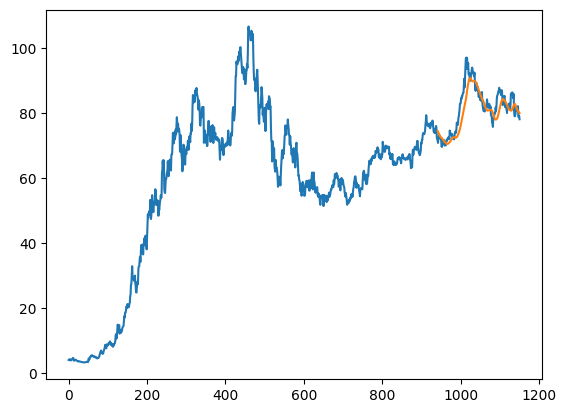

In [14]:
import matplotlib.pyplot as plt

plt.plot(original_data)
plt.plot(predicted_data)

In [15]:
new_predictions = model.predict(x_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data, new_predictions)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


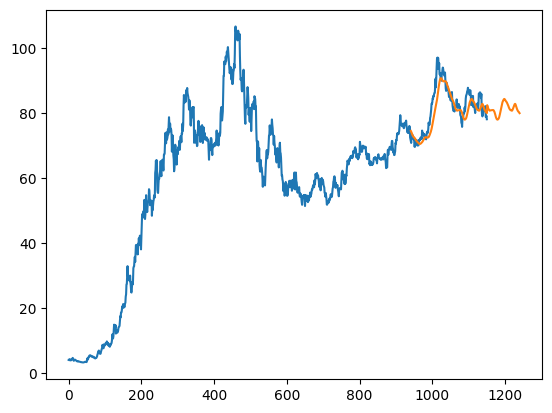

In [16]:
plt.plot(original_data)
plt.plot(predicted_data)